**Visualization what convnet learn**

It’s often said that deep-learning models are **“black boxes”**: learning representations
that are difficult to extract and present in a human-readable form. Although this is
partially true for certain types of deep-learning models, it’s definitely not true for
convnets. The representations learned by **convnets** are highly amenable to visualization, in large part because they’re **representations of visual concepts**

We'll see three of the most accessible and useful ones:

- **Visualization intermediate convnet outputs (Intermediate Activation):-** Useful for
   understanding how successive convnet layers transform their input, and for getting a first idea of the meaning of          individual convnet filters.
   
- **Visualization convnet filters:-** Useful for understanding precisely what visual pattern or concept each filter in a convnet is receptive to.

- **Visualization heatmaps of class activation in Image:-** Useful for understanding
  which parts of an image were identified as belonging to a given class, thus allowing you to localize objects in images.

In [1]:
# 1. Visualization intermdiate activations:

from tensorflow.keras.models import load_model

model = load_model('cats_and_dogs_small_2.h5')
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 15, 15, 128)      

In [2]:
# preprocessing a singal image-
img_path=r"C:\Users\Raju\Desktop\Project\cats_dogs\test\cats\cat.1565.jpg"

from tensorflow.keras.preprocessing import image  # for image preprocessing
import numpy as np                                # for array processing

img=image.load_img(img_path,target_size=(150,150))  # load the image from path
img_tensor=image.img_to_array(img)                 # convert image into array
img_tensor=np.expand_dims(img_tensor,axis=0)       # expand dimession of the image array
img_tensor/=255.                                   # scaling the image array data

print(img_tensor.shape)

(1, 150, 150, 3)


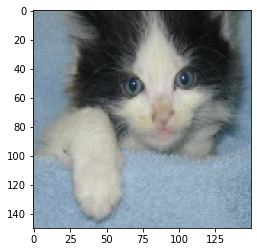

In [9]:
# let's display the image

import matplotlib.pyplot as plt

# since the shape of image is (1,150,150,3) the 1 represents the sample size of the img_Tensor 
# so to display the image we have to give the sample index of the image
plt.imshow(img_tensor[0])
plt.show()

In order to extract the feature maps you want to look at, you’ll create a Keras model
that takes batches of images as input, and outputs the activations of all convolution and
pooling layers. To do this, you’ll use the Keras class Model. A model is instantiated
using two arguments: an input tensor (or list of input tensors) and an output tensor
(or list of output tensors). The resulting class is a Keras model, just like the Sequential
models you’re familiar with, mapping the specified inputs to the specified outputs.

In [10]:
from tensorflow.keras import models
# Extracting the outputs od the top eight layers
layer_outputs = [layer.output for layer in model.layers[:8]]
# Creates a model that will return thes outputs, given the model inputs
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)

In [27]:
activation_model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4_input (InputLayer)  [(None, 150, 150, 3)]     0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 17, 17, 128)       0     

In [28]:
# Running the model in predict mode

activations= activation_model.predict(img_tensor)

Return a list of 5 numpy array:- One numpy array per layer activation

In [29]:
# let's see the  first convolution layer activation

first_layer_activation=activations[0]
print(first_layer_activation.shape)

(1, 148, 148, 32)


It's 148 x 148 feature maps with 32 channels

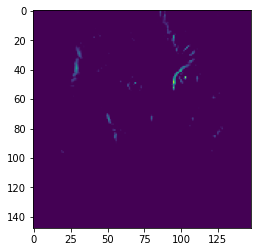

In [33]:
# Let's try to visualize fourth channel of first layer of original model

import matplotlib.pyplot as plt

plt.imshow(first_layer_activation[0,:,:,4],cmap='viridis')

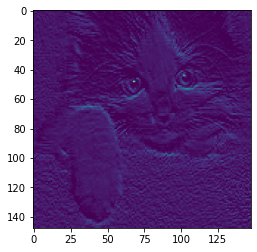

In [40]:
plt.imshow(first_layer_activation[0,:,:,13])